In [4]:
import pandas as pd

df = pd.read_csv('data/processed/trip_features_with_location_context.csv')  
df

,trip_id,distance,duration,avg_speed,start_time,end_time,start_location,end_location,halt_count,avg_halt_duration,max_halt_duration,max_halt_location,start_label,end_label,max_halt_label
0,C001_06-Veloci2_1.0,5080.199201,19.950000,4.244110,2024-01-31 17:49:44,2024-01-31 18:09:41,"(52.66710166666667, -8.576183333333333)","(52.67005833333333, -8.633385)",6,33.791667,96.0,"(52.66534, -8.607245)",Commercial,Residential,Commercial
1,C001_06-Veloci2_110.0,6298.928335,19.500000,5.383699,2024-03-04 08:42:54,2024-03-04 09:02:24,"(52.67011, -8.633483333333333)","(52.667611666666666, -8.574975)",3,7.636364,20.0,"(52.66794166666666, -8.576695)",Residential,Commercial,Residential
2,C001_06-Veloci2_111.0,1765.016288,9.516667,3.091097,2024-03-04 10:18:56,2024-03-04 10:28:27,"(52.666605, -8.57684)","(52.672138333333336, -8.556015)",3,86.214286,309.0,"(52.672138333333336, -8.556015)",Recreational,Commercial,Commercial
3,C001_06-Veloci2_112.0,3399.361455,7.916667,7.156550,2024-03-04 12:21:25,2024-03-04 12:29:20,"(52.67209666666667, -8.555928333333334)","(52.671821666666666, -8.55602)",3,188.461538,451.0,"(52.671821666666666, -8.55602)",Commercial,Commercial,Commercial
4,C001_06-Veloci2_113.0,8880.359707,33.950000,4.359529,2024-03-04 18:16:24,2024-03-04 18:50:21,"(52.671821666666666, -8.55602)","(52.66999833333333, -8.63372)",8,41.325000,223.0,"(52.670008333333335, -8.633391666666666)",Commercial,Residential,Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653,P666_ZZ-JG_86.0,4132.682274,21.433333,3.213594,2023-09-20 15:43:41,2023-09-20 16:05:07,"(52.67801833333333, -8.569161666666666)","(52.666845, -8.543201666666667)",4,160.655172,316.0,"(52.666845, -8.543201666666667)",School,Residential,Residential
4654,P666_ZZ-JG_87.0,3149.144739,21.216667,2.473798,2023-09-20 16:22:05,2023-09-20 16:43:18,"(52.666205, -8.54393)","(52.66678666666667, -8.543111666666666)",5,119.760000,281.0,"(52.65831333333333, -8.54979)",Residential,Residential,School
4655,P666_ZZ-JG_88.0,3692.867836,24.033333,2.560935,2023-09-20 17:28:30,2023-09-20 17:52:32,"(52.66665833333333, -8.543538333333334)","(52.66679666666667, -8.543175)",5,211.750000,581.0,"(52.66080333333333, -8.54976)",Residential,Residential,Residential
4656,P666_ZZ-JG_89.0,3149.814093,16.933333,3.100211,2023-09-20 18:53:16,2023-09-20 19:10:12,"(52.66588166666666, -8.545276666666666)","(52.666855, -8.543191666666667)",6,72.350000,365.0,"(52.65833666666666, -8.549711666666667)",Recreational,Residential,Recreational


In [5]:
df.describe().round(4)

,distance,duration,avg_speed,halt_count,avg_halt_duration,max_halt_duration
count,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000
mean,4282.0535,35.2952,3.9502,4.1286,84.4355,184.3493
std,3453.4670,333.9172,3.7473,2.5962,96.4243,212.5896
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1992.6556,9.5000,2.6626,2.0000,23.3333,40.0000
50%,3433.0564,16.3250,3.9704,4.0000,54.6667,120.0000
75%,5813.0273,25.2667,5.0249,5.0000,111.5262,281.0000
max,41674.5950,9759.2667,210.4608,34.0000,1259.7188,4282.0000


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

def time_of_day_category(hour):
    """
    Classify the given hour into morning, afternoon, evening, or night.
    """
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'


def prepare_for_clustering(df):
    """
    Prepare the given DataFrame for clustering algorithms by encoding categorical variables
    and scaling numerical variables. Includes new features for time categories.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing trip data.

    Returns:
    - pd.DataFrame: The transformed DataFrame ready for clustering.
    """
    
    # Ensure start_time and end_time are in datetime format
    df['start_time'] = pd.to_datetime(df['start_time'], format='mixed')
    df['end_time'] = pd.to_datetime(df['end_time'], format='mixed')

    # Create new columns for time categories (morning, afternoon, evening, night)
    df['start_time_category'] = df['start_time'].dt.hour.apply(time_of_day_category)
    df['end_time_category'] = df['end_time'].dt.hour.apply(time_of_day_category)
    
    # Create new columns for the day of the week (Mon, Tue, ...)
    df['start_time_day'] = df['start_time'].dt.day_name().str[:3]
    df['end_time_day'] = df['end_time'].dt.day_name().str[:3]
    
    # Drop start_location and end_location as we have start_label and end_label
    df = df.drop(['start_location', 'end_location', 'start_time', 'end_time'], axis=1, inplace=False)
    # Set trip_id as the index
    df = df.set_index('trip_id')
    # Define numerical and categorical columns
    numerical_features = [
        'distance', 'duration', 'avg_speed', 'halt_count', 
        'avg_halt_duration', 'max_halt_duration'
    ]

    categorical_features = ['start_label', 'end_label', 'max_halt_label', 
                            'start_time_category', 'end_time_category', 
                            'start_time_day', 'end_time_day']
    
    # Preprocessing for numerical data: scaling and handling missing values
    numerical_transformer = Pipeline(steps=[ 
        ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
        ('scaler', StandardScaler())  # Standardize numerical features
    ])
    
    # Preprocessing for categorical data: one-hot encoding and handling missing values
    categorical_transformer = Pipeline(steps=[ 
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values by replacing with most frequent
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical features
    ])
    
    # Combine numerical and categorical transformations using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[ 
            ('num', numerical_transformer, numerical_features), 
            ('cat', categorical_transformer, categorical_features) 
        ]
    )
    
    # print(df)
    # Apply transformations to the data
    X_transformed = preprocessor.fit_transform(df)
    
    # Get column names after transformation
    # First, get numerical columns
    num_columns = numerical_features
    
    # Then, get one-hot encoded column names
    cat_columns = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)
    
    # Combine both
    column_names = num_columns + list(cat_columns)
    print(column_names)
    print(X_transformed.toarray())
    
    # Convert the transformed data back into a DataFrame
    X_transformed_df = pd.DataFrame(X_transformed.toarray(), columns=column_names)
    
    return X_transformed_df


# Example: Assuming merged_df is your input DataFrame
prepared_data = prepare_for_clustering(df)

# Display the transformed data (first few rows)
prepared_data.head()


['distance', 'duration', 'avg_speed', 'halt_count', 'avg_halt_duration', 'max_halt_duration', 'start_label_Commercial', 'start_label_Industrial', 'start_label_Public Institution', 'start_label_Recreational', 'start_label_Religious', 'start_label_Residential', 'start_label_School', 'start_label_Transportation', 'end_label_Commercial', 'end_label_Industrial', 'end_label_Public Institution', 'end_label_Recreational', 'end_label_Religious', 'end_label_Residential', 'end_label_School', 'end_label_Transportation', 'max_halt_label_Commercial', 'max_halt_label_Industrial', 'max_halt_label_Public Institution', 'max_halt_label_Recreational', 'max_halt_label_Religious', 'max_halt_label_Residential', 'max_halt_label_School', 'max_halt_label_Transportation', 'start_time_category_Afternoon', 'start_time_category_Evening', 'start_time_category_Morning', 'start_time_category_Night', 'end_time_category_Afternoon', 'end_time_category_Evening', 'end_time_category_Morning', 'end_time_category_Night', 'sta

,distance,duration,avg_speed,halt_count,avg_halt_duration,max_halt_duration,start_label_Commercial,start_label_Industrial,start_label_Public Institution,start_label_Recreational,...,start_time_day_Thu,start_time_day_Tue,start_time_day_Wed,end_time_day_Fri,end_time_day_Mon,end_time_day_Sat,end_time_day_Sun,end_time_day_Thu,end_time_day_Tue,end_time_day_Wed
0,0.231139,-0.045960,0.078444,0.720895,-0.525275,-0.415631,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.584077,-0.047308,0.382586,-0.434753,-0.796556,-0.773166,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.728922,-0.077209,-0.229281,-0.434753,0.018450,0.586407,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.255623,-0.082001,0.855739,-0.434753,1.078953,1.254433,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.331647,-0.004029,0.109248,1.491327,-0.447140,0.181829,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
prepared_data.describe().round(4)

,distance,duration,avg_speed,halt_count,avg_halt_duration,max_halt_duration,start_label_Commercial,start_label_Industrial,start_label_Public Institution,start_label_Recreational,...,start_time_day_Thu,start_time_day_Tue,start_time_day_Wed,end_time_day_Fri,end_time_day_Mon,end_time_day_Sat,end_time_day_Sun,end_time_day_Thu,end_time_day_Tue,end_time_day_Wed
count,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,...,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000,4658.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.1501,0.0054,0.0122,0.0331,...,0.1969,0.1803,0.1943,0.1458,0.1533,0.0698,0.0595,0.1969,0.1801,0.1947
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,0.3572,0.0731,0.1100,0.1788,...,0.3977,0.3845,0.3957,0.3529,0.3603,0.2548,0.2365,0.3977,0.3843,0.3960
min,-1.2401,-0.1057,-1.0543,-1.5904,-0.8758,-0.8673,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,-0.6630,-0.0773,-0.3437,-0.8200,-0.6337,-0.6791,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,-0.2459,-0.0568,0.0054,-0.0495,-0.3088,-0.3027,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.4434,-0.0300,0.2868,0.3357,0.2810,0.4547,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,10.8287,29.1240,55.1152,11.5069,12.1900,19.2770,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [8]:
prepared_data.shape

(4658, 52)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'seaborn'

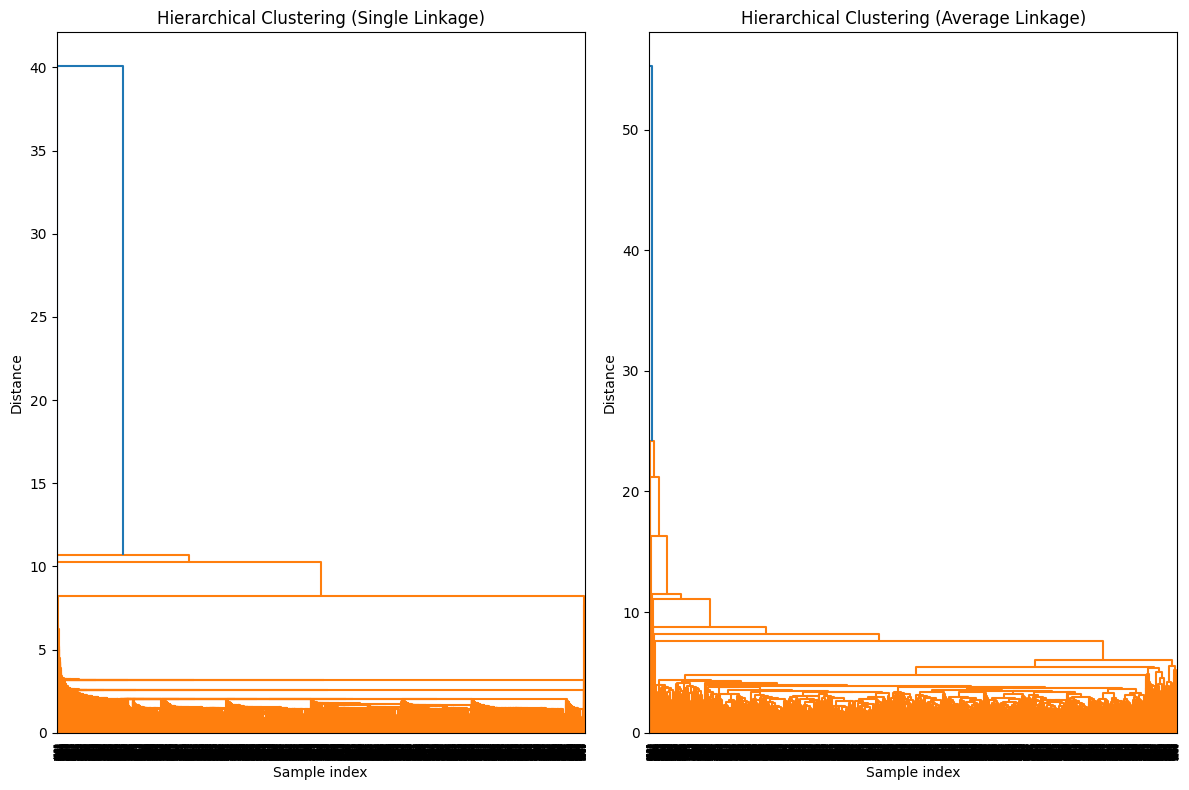

In [57]:
# Set up the figure
plt.figure(figsize=(12, 8))

# Perform single linkage
Z_single = linkage(prepared_data, method='single', metric='euclidean')

# Plot the dendrogram for single linkage
plt.subplot(121)
dendrogram(Z_single)
plt.title("Hierarchical Clustering (Single Linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")

# Perform average linkage
Z_average = linkage(prepared_data, method='average', metric='euclidean')

# Plot the dendrogram for average linkage
plt.subplot(122)
dendrogram(Z_average)
plt.title("Hierarchical Clustering (Average Linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")

# Show the plots
plt.tight_layout()
plt.show()


In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [14]:
# Number of clusters
n_clusters = 6  # You can adjust this number based on your data and desired granularity

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the KMeans model to the data
kmeans.fit(prepared_data)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
prepared_data['kmeans_cluster'] = cluster_labels

# Print the first few rows of the DataFrame to see the clustering result
(prepared_data)


,distance,duration,avg_speed,halt_count,avg_halt_duration,max_halt_duration,start_label_Commercial,start_label_Industrial,start_label_Public Institution,start_label_Recreational,...,start_time_day_Tue,start_time_day_Wed,end_time_day_Fri,end_time_day_Mon,end_time_day_Sat,end_time_day_Sun,end_time_day_Thu,end_time_day_Tue,end_time_day_Wed,kmeans_cluster
0,0.231139,-0.045960,0.078444,0.720895,-0.525275,-0.415631,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
1,0.584077,-0.047308,0.382586,-0.434753,-0.796556,-0.773166,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
2,-0.728922,-0.077209,-0.229281,-0.434753,0.018450,0.586407,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
3,-0.255623,-0.082001,0.855739,-0.434753,1.078953,1.254433,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
4,1.331647,-0.004029,0.109248,1.491327,-0.447140,0.181829,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653,-0.043257,-0.041517,-0.196588,-0.049537,0.790547,0.619338,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
4654,-0.328085,-0.042166,-0.394031,0.335679,0.366384,0.454684,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5
4655,-0.170625,-0.033730,-0.370775,0.335679,1.320500,1.866005,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
4656,-0.327891,-0.054995,-0.226849,0.720895,-0.125350,0.849854,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5


In [15]:
prepared_data['kmeans_cluster'].value_counts()

kmeans_cluster
2    1625
5    1569
0     642
1     432
4     380
3      10
Name: count, dtype: int64

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Initialize an empty list to store the results
silhouette_scores = []

# Loop through k values from 2 to 20
for k in range(2, 21):
    # Initialize the KMeans model for the current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans model to the prepared data
    kmeans.fit(prepared_data)
    
    # Get the cluster labels
    cluster_labels = kmeans.labels_
    
    # Calculate the silhouette score
    sil_score = silhouette_score(prepared_data, cluster_labels)
    
    # Append the k value and corresponding silhouette score to the list
    silhouette_scores.append({'k': k, 'silhouette_score': sil_score})

# Convert the list into a DataFrame for better visualization
silhouette_df = pd.DataFrame(silhouette_scores)

# Print the silhouette scores for each k value
print(silhouette_df)


     k  silhouette_score
0    2          0.265578
1    3          0.239095
2    4          0.247986
3    5          0.201555
4    6          0.207660
5    7          0.208638
6    8          0.171996
7    9          0.166456
8   10          0.094137
9   11          0.096848
10  12          0.101726
11  13          0.119300
12  14          0.123491
13  15          0.121734
14  16          0.116384
15  17          0.129352
16  18          0.130380
17  19          0.126910
18  20          0.140224


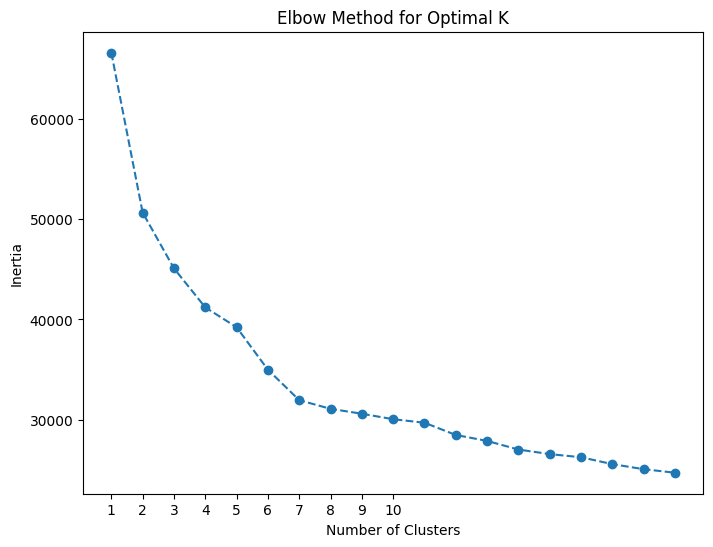

In [80]:
# Use the Elbow Method to find the optimal number of clusters
inertia = []  # list to store inertia values for different k values

for k in range(1, 20):  # Trying cluster sizes from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(prepared_data)
    inertia.append(kmeans.inertia_)  # inertia = within-cluster sum of squares

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()


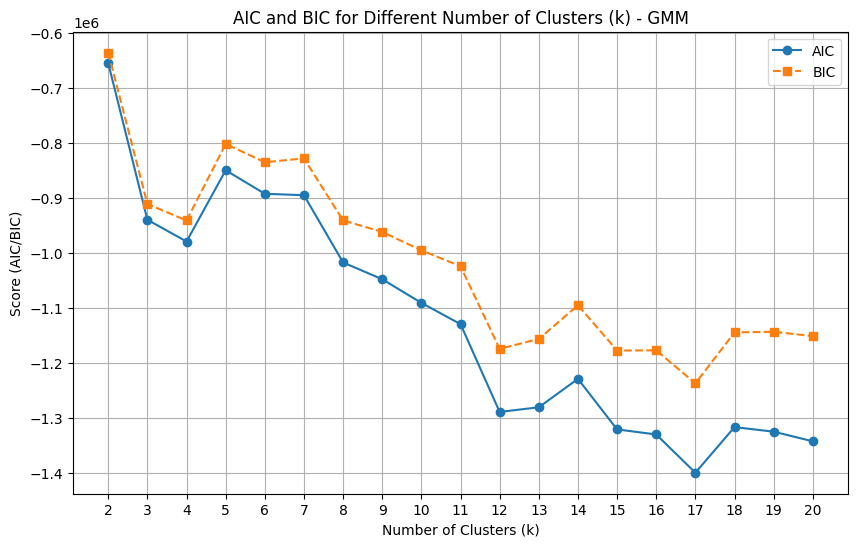

     k           AIC           BIC
0    2 -6.543471e+05 -6.352079e+05
1    3 -9.392899e+05 -9.105779e+05
2    4 -9.788896e+05 -9.406048e+05
3    5 -8.491963e+05 -8.013387e+05
4    6 -8.919885e+05 -8.345580e+05
5    7 -8.945964e+05 -8.275931e+05
6    8 -1.017040e+06 -9.404637e+05
7    9 -1.047567e+06 -9.614182e+05
8   10 -1.090583e+06 -9.948613e+05
9   11 -1.129256e+06 -1.023961e+06
10  12 -1.289170e+06 -1.174303e+06
11  13 -1.280588e+06 -1.156148e+06
12  14 -1.228922e+06 -1.094909e+06
13  15 -1.320899e+06 -1.177313e+06
14  16 -1.330156e+06 -1.176997e+06
15  17 -1.399752e+06 -1.237020e+06
16  18 -1.316723e+06 -1.144418e+06
17  19 -1.325050e+06 -1.143173e+06
18  20 -1.342553e+06 -1.151103e+06


In [17]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a list to store the results for AIC and BIC
results = {'k': [], 'AIC': [], 'BIC': []}

# Loop through k values from 2 to 20
for k in range(2, 21):
    # Initialize the GMM model for the current k value
    gmm = GaussianMixture(n_components=k, random_state=42)
    
    # Fit the model to the prepared data
    gmm.fit(prepared_data)
    
    # Get the AIC and BIC for the current k value
    results['k'].append(k)
    results['AIC'].append(gmm.aic(prepared_data))
    results['BIC'].append(gmm.bic(prepared_data))

# Convert the results to a DataFrame for easy visualization
gmm_results_df = pd.DataFrame(results)

# Plot AIC and BIC to help determine the optimal k value
plt.figure(figsize=(10, 6))

plt.plot(gmm_results_df['k'], gmm_results_df['AIC'], marker='o', linestyle='-', label='AIC')
plt.plot(gmm_results_df['k'], gmm_results_df['BIC'], marker='s', linestyle='--', label='BIC')

plt.title('AIC and BIC for Different Number of Clusters (k) - GMM')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score (AIC/BIC)')
plt.legend()
plt.grid(True)
plt.xticks(range(2, 21))
plt.show()

# Print the results
print(gmm_results_df)


In [18]:
# First, let's assume you've already fit the GMM model with k=4
optimal_k = 4

# Fit the final GMM model with the optimal number of clusters
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(prepared_data)

# Get the cluster labels
cluster_labels = gmm.predict(prepared_data)

# Add the cluster labels to the DataFrame
prepared_data['gmm_cluster'] = cluster_labels

# Now, calculate the average of the numeric features in each cluster
numeric_features = ['distance', 'duration', 'avg_speed', 'halt_count', 'avg_halt_duration', 'max_halt_duration']

# Group by the cluster labels and calculate the mean for each numeric feature
cluster_avg_values = prepared_data.groupby('gmm_cluster')[numeric_features].mean()

# Display the result
(cluster_avg_values)


,distance,duration,avg_speed,halt_count,avg_halt_duration,max_halt_duration
gmm_cluster,,,,,,
0,-0.295923,-0.034950,-0.476197,-0.121375,2.427132,1.816571
1,-0.308768,-0.062380,-0.003054,-0.257308,-0.246768,-0.263269
2,0.655854,0.951699,-0.103367,0.879018,0.019740,0.309484
3,0.172037,-0.043271,0.081109,0.094804,-0.207485,-0.134163


In [20]:
df['gmm_cluster'] = prepared_data['gmm_cluster']
df['kmeans_cluster'] = prepared_data['kmeans_cluster']

In [21]:
numeric_features = ['distance', 'duration', 'avg_speed', 'halt_count', 'avg_halt_duration', 'max_halt_duration']

# Group by the cluster labels and calculate the mean for each numeric feature
cluster_avg_values = df.groupby('gmm_cluster')[numeric_features].mean()

# Display the result
(cluster_avg_values)

,distance,duration,avg_speed,halt_count,avg_halt_duration,max_halt_duration
gmm_cluster,,,,,,
0,3260.202780,23.625946,2.165931,3.813514,318.444784,570.491892
1,3215.848052,14.467838,3.938748,3.460638,60.643649,128.387118
2,6546.779771,353.049709,3.562883,6.410480,86.338668,250.135371
3,4876.113927,20.847746,4.254097,4.374703,64.431014,155.830690


In [22]:
df[['start_time_category','gmm_cluster']].value_counts()

start_time_category  gmm_cluster
Morning              3              1606
Afternoon            1              1287
                     3               660
                     0               205
Night                3               187
Evening              1               179
Morning              0               135
                     2               119
Afternoon            2                96
Evening              3                69
Night                1                54
Evening              0                20
Morning              1                17
Evening              2                14
Night                0                10
Name: count, dtype: int64

In [23]:
df[df['kmeans_cluster']==0]['start_label'].value_counts()

start_label
Residential           290
School                179
Commercial            108
Transportation         39
Recreational           12
Public Institution     10
Industrial              4
Name: count, dtype: int64

In [24]:
df[df['gmm_cluster']==0][['start_label', 'end_label']].value_counts()

start_label     end_label         
Residential     Residential           79
School          Residential           44
                School                42
Commercial      Residential           37
Residential     School                30
                Commercial            24
Commercial      Commercial            19
Residential     Transportation        13
School          Commercial            13
Transportation  Residential           11
Residential     Recreational          10
Commercial      School                 8
Transportation  Transportation         7
Recreational    Residential            6
Commercial      Transportation         5
Transportation  School                 4
School          Transportation         4
                Recreational           2
Recreational    School                 2
Transportation  Commercial             2
School          Public Institution     2
Recreational    Transportation         1
                Public Institution     1
Commercial      Recrea

In [ ]:
df.to_csv('data/processed/clustered_trips.csv', index=False)

In [26]:
df

,trip_id,distance,duration,avg_speed,start_time,end_time,start_location,end_location,halt_count,avg_halt_duration,...,max_halt_location,start_label,end_label,max_halt_label,start_time_category,end_time_category,start_time_day,end_time_day,gmm_cluster,kmeans_cluster
0,C001_06-Veloci2_1.0,5080.199201,19.950000,4.244110,2024-01-31 17:49:44,2024-01-31 18:09:41,"(52.66710166666667, -8.576183333333333)","(52.67005833333333, -8.633385)",6,33.791667,...,"(52.66534, -8.607245)",Commercial,Residential,Commercial,Afternoon,Evening,Wed,Wed,1,5
1,C001_06-Veloci2_110.0,6298.928335,19.500000,5.383699,2024-03-04 08:42:54,2024-03-04 09:02:24,"(52.67011, -8.633483333333333)","(52.667611666666666, -8.574975)",3,7.636364,...,"(52.66794166666666, -8.576695)",Residential,Commercial,Residential,Morning,Morning,Mon,Mon,3,2
2,C001_06-Veloci2_111.0,1765.016288,9.516667,3.091097,2024-03-04 10:18:56,2024-03-04 10:28:27,"(52.666605, -8.57684)","(52.672138333333336, -8.556015)",3,86.214286,...,"(52.672138333333336, -8.556015)",Recreational,Commercial,Commercial,Morning,Morning,Mon,Mon,3,2
3,C001_06-Veloci2_112.0,3399.361455,7.916667,7.156550,2024-03-04 12:21:25,2024-03-04 12:29:20,"(52.67209666666667, -8.555928333333334)","(52.671821666666666, -8.55602)",3,188.461538,...,"(52.671821666666666, -8.55602)",Commercial,Commercial,Commercial,Afternoon,Afternoon,Mon,Mon,0,4
4,C001_06-Veloci2_113.0,8880.359707,33.950000,4.359529,2024-03-04 18:16:24,2024-03-04 18:50:21,"(52.671821666666666, -8.55602)","(52.66999833333333, -8.63372)",8,41.325000,...,"(52.670008333333335, -8.633391666666666)",Commercial,Residential,Residential,Evening,Evening,Mon,Mon,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4653,P666_ZZ-JG_86.0,4132.682274,21.433333,3.213594,2023-09-20 15:43:41,2023-09-20 16:05:07,"(52.67801833333333, -8.569161666666666)","(52.666845, -8.543201666666667)",4,160.655172,...,"(52.666845, -8.543201666666667)",School,Residential,Residential,Afternoon,Afternoon,Wed,Wed,1,5
4654,P666_ZZ-JG_87.0,3149.144739,21.216667,2.473798,2023-09-20 16:22:05,2023-09-20 16:43:18,"(52.666205, -8.54393)","(52.66678666666667, -8.543111666666666)",5,119.760000,...,"(52.65831333333333, -8.54979)",Residential,Residential,School,Afternoon,Afternoon,Wed,Wed,1,5
4655,P666_ZZ-JG_88.0,3692.867836,24.033333,2.560935,2023-09-20 17:28:30,2023-09-20 17:52:32,"(52.66665833333333, -8.543538333333334)","(52.66679666666667, -8.543175)",5,211.750000,...,"(52.66080333333333, -8.54976)",Residential,Residential,Residential,Afternoon,Afternoon,Wed,Wed,0,4
4656,P666_ZZ-JG_89.0,3149.814093,16.933333,3.100211,2023-09-20 18:53:16,2023-09-20 19:10:12,"(52.66588166666666, -8.545276666666666)","(52.666855, -8.543191666666667)",6,72.350000,...,"(52.65833666666666, -8.549711666666667)",Recreational,Residential,Recreational,Evening,Evening,Wed,Wed,1,5
